In [1]:
import os

# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
import random
import shutil

data = "/content/gdrive/MyDrive/CNN_çiçek/flower_photos"
train = "/content/gdrive/MyDrive/CNN_çiçek/test"
test = "/content/gdrive/MyDrive/CNN_çiçek/train"

# Train ve test klasörlerini oluşturun
os.makedirs(train, exist_ok=True)
os.makedirs(test, exist_ok=True)

# Her çiçek türünden örnek sayıları
classes = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
sample_counts = [633, 898, 641, 699, 799]

# Her çiçek türündeki dosya listelerini elde edin
file_lists = []
for flower_class, count in zip(classes, sample_counts):
    files = [f"{flower_class}/{filename}" for filename in os.listdir(os.path.join(data, flower_class))]
    random.shuffle(files)
    file_lists.append(files)

# Train ve test verilerini kopyalayın
for i, flower_class in enumerate(classes):
    for j, filename in enumerate(file_lists[i]):
        src_path = os.path.join(data, filename)
        if j < int(0.2 * sample_counts[i]):
            dest_path = os.path.join(train, filename)
        else:
            dest_path = os.path.join(test, filename)
        os.makedirs(os.path.dirname(dest_path), exist_ok=True)
        shutil.copyfile(src_path, dest_path)

In [18]:
image_gen = ImageDataGenerator(rotation_range=15, 
                               width_shift_range=0.10, 
                               height_shift_range=0.10, 
                               rescale=1/255, 
                               shear_range=0.1, 
                               zoom_range=0.1, 
                               horizontal_flip=True, 
                               fill_mode='nearest')

In [19]:
IMG_WIDTH = 150
IMG_HEIGHT = 150
BATCH_SIZE = 32

train_generator = image_gen.flow_from_directory(train_path,
                                                   target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                   batch_size=BATCH_SIZE,
                                                   class_mode='categorical',
                                                   shuffle=True)

Found 2939 images belonging to 5 classes.


In [20]:
test_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = image_gen.flow_from_directory(test_path,
                                                             target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                             batch_size=BATCH_SIZE,
                                                             class_mode='categorical',
                                                             shuffle=True)

Found 731 images belonging to 5 classes.


In [ ]:
# Get the Label Mappings

In [21]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : daisy
1 : dandelion
2 : roses
3 : sunflowers
4 : tulips


In [ ]:
# SAMPLE IMAGE

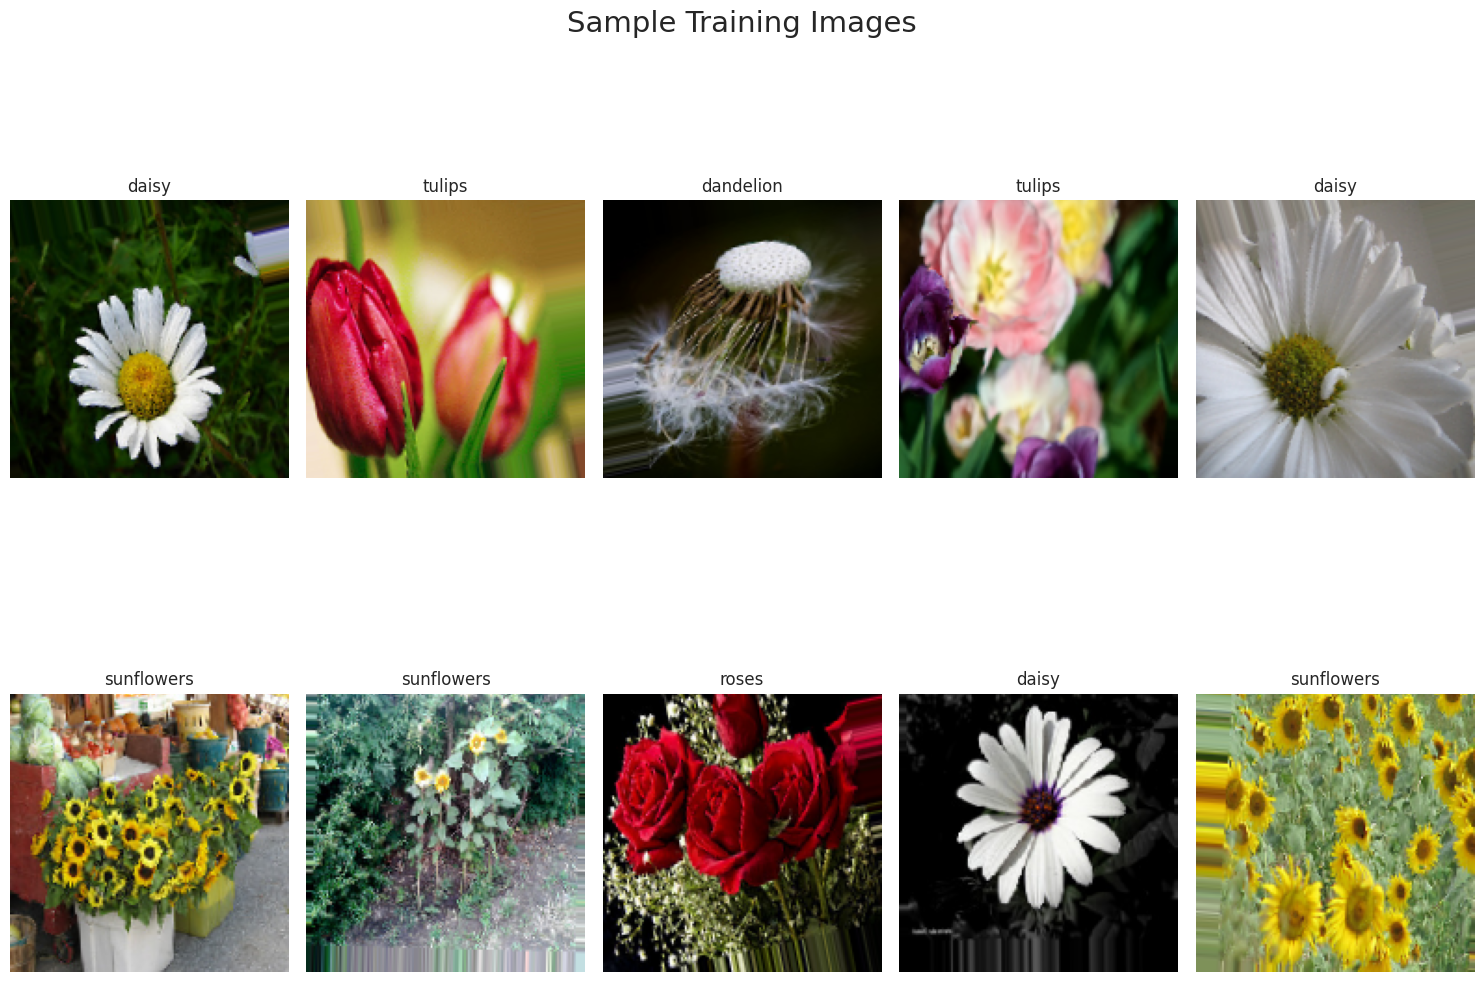

In [79]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 12))
idx = 0

for i in range(2):
    for j in range(5):
        label = labels[np.argmax(train_generator[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_generator[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

In [ ]:
# TRAINING CNN

In [24]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

print( model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 96)       0

In [ ]:
# LR

In [25]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)

In [28]:
# compile model

model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [29]:
#training model

history = model.fit(train_generator, epochs=20, validation_data=validation_generator,
                       verbose=2,
                       callbacks=[reduce_lr])

Epoch 1/20
92/92 - 909s - loss: 1.2694 - accuracy: 0.4328 - val_loss: 1.1295 - val_accuracy: 0.5527 - lr: 0.0010 - 909s/epoch - 10s/step
Epoch 2/20
92/92 - 285s - loss: 1.0307 - accuracy: 0.5859 - val_loss: 1.0143 - val_accuracy: 0.6074 - lr: 0.0010 - 285s/epoch - 3s/step
Epoch 3/20
92/92 - 280s - loss: 0.9329 - accuracy: 0.6267 - val_loss: 0.9035 - val_accuracy: 0.6525 - lr: 0.0010 - 280s/epoch - 3s/step
Epoch 4/20
92/92 - 278s - loss: 0.8497 - accuracy: 0.6679 - val_loss: 0.9749 - val_accuracy: 0.6060 - lr: 0.0010 - 278s/epoch - 3s/step
Epoch 5/20
92/92 - 258s - loss: 0.8350 - accuracy: 0.6662 - val_loss: 0.8523 - val_accuracy: 0.6580 - lr: 0.0010 - 258s/epoch - 3s/step
Epoch 6/20
92/92 - 276s - loss: 0.7598 - accuracy: 0.7084 - val_loss: 0.8123 - val_accuracy: 0.6881 - lr: 0.0010 - 276s/epoch - 3s/step
Epoch 7/20
92/92 - 278s - loss: 0.7570 - accuracy: 0.7084 - val_loss: 0.7962 - val_accuracy: 0.6977 - lr: 0.0010 - 278s/epoch - 3s/step
Epoch 8/20
92/92 - 280s - loss: 0.7085 - accura

In [30]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy,lr
0,1.269445,0.432800,1.129461,0.552668,0.001
1,1.030690,0.585914,1.014315,0.607387,0.001
2,0.932941,0.626744,0.903522,0.652531,0.001
3,0.849739,0.667914,0.974913,0.606019,0.001
4,0.835014,0.666213,0.852313,0.658003,0.001


In [ ]:
# PLOTTING MODEL METRICS

In [31]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

learning_rate = history.history['lr']

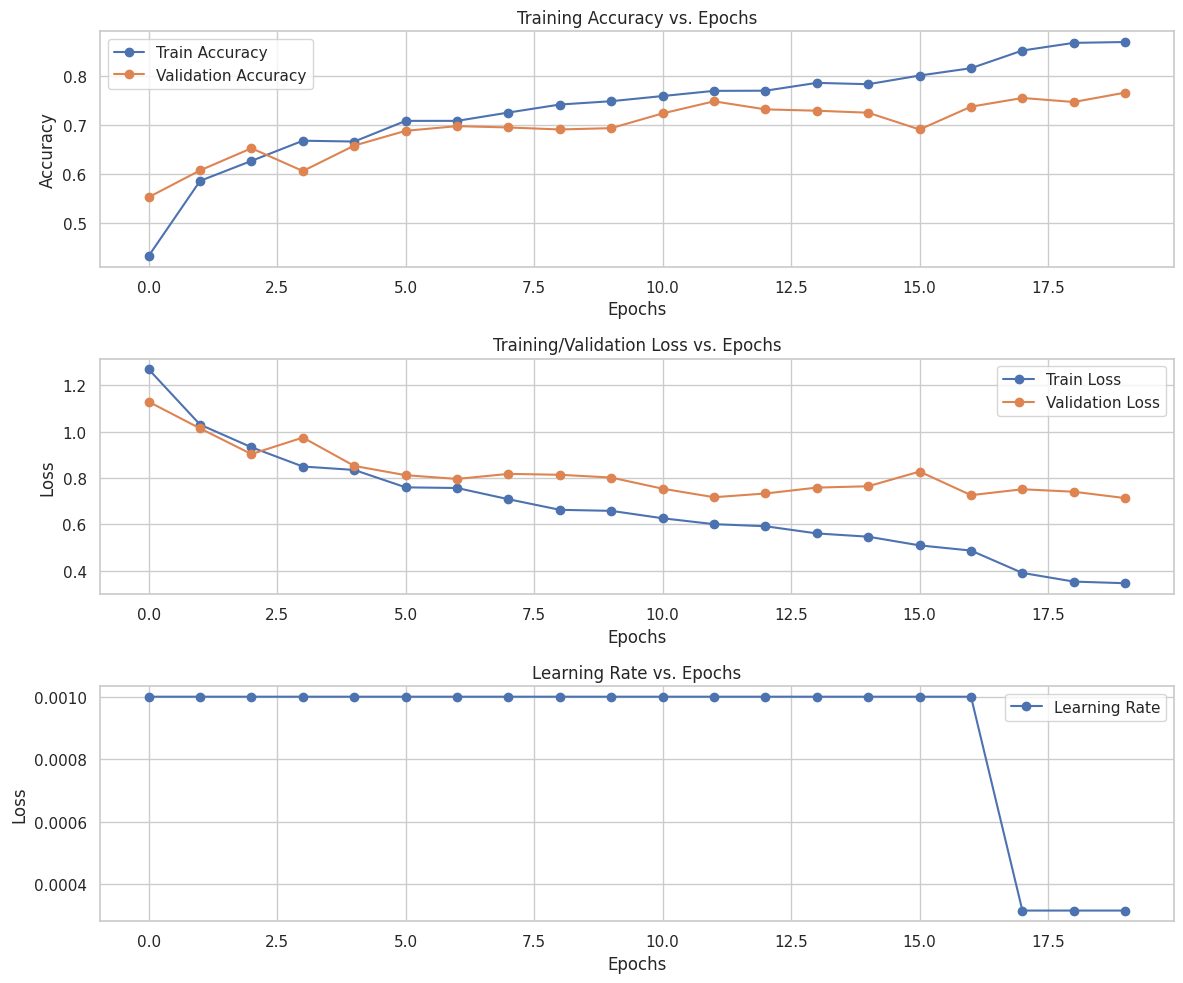

In [32]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

ax[2].set_title('Learning Rate vs. Epochs')
ax[2].plot(learning_rate, 'o-', label='Learning Rate')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Loss')
ax[2].legend(loc='best')

plt.tight_layout()
plt.show()

In [ ]:
# Testing the Some Pic 

In [34]:
deneme_1 = "/content/gdrive/MyDrive/CNN_çiçek/deneme/0000000.jpg"

In [36]:
from tensorflow.keras.preprocessing import image

my_image = image.load_img(deneme_1,target_size=(150,150,3))

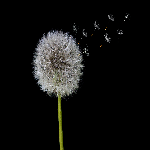

In [37]:
my_image

In [ ]:
tf.keras.preprocessing.image.smart_resize(my_image, (150,150))

In [40]:
type(my_image)

PIL.Image.Image

In [41]:
my_image = image.img_to_array(my_image)

In [42]:
type(my_image)

numpy.ndarray

In [43]:
my_image.shape

(150, 150, 3)

In [44]:
my_image = np.expand_dims(my_image, axis=0)

In [45]:
my_image.shape

(1, 150, 150, 3)

In [46]:
model.predict(my_image)

1/1 [==============================] - 0s 203ms/step


array([[0.0000000e+00, 1.4669379e-18, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00]], dtype=float32)

In [48]:
train_generator.class_indices

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [66]:
deneme_2 = "/content/gdrive/MyDrive/CNN_çiçek/deneme/1111111.jpeg"

In [67]:
my_image2 = image.load_img(deneme_2,target_size=(150,150,3))

tf.keras.preprocessing.image.smart_resize(my_image2, (150,150))

my_image2 = image.img_to_array(my_image2)

my_image2 = np.expand_dims(my_image2, axis=0)



In [69]:
model.predict(my_image2) #doğru tahmin

1/1 [==============================] - 0s 171ms/step


array([[0., 0., 0., 0., 1.]], dtype=float32)

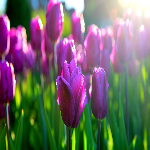

In [70]:
my_image2 = image.load_img(deneme_2,target_size=(150,150,3))

my_image2

In [71]:
#deneme 3

In [74]:
deneme_3 = "/content/gdrive/MyDrive/CNN_çiçek/deneme/22222.jpg"

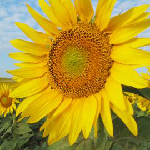

In [75]:
my_image3 = image.load_img(deneme_3,target_size=(150,150,3))

my_image3

In [78]:
tf.keras.preprocessing.image.smart_resize(my_image3, (150,150))

my_image3 = image.img_to_array(my_image3)

my_image3 = np.expand_dims(my_image3, axis=0)

model.predict(my_image3) #doğru tahmin

1/1 [==============================] - 0s 79ms/step


array([[0., 0., 0., 1., 0.]], dtype=float32)